concrete dataset 2


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Load the dataset
concrete_df = pd.read_csv('D:\\Downloads\\Concrete_Data.csv')

In [9]:
print(concrete_df.head())
print(concrete_df.info())
print(concrete_df.describe())


   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [10]:
print(concrete_df.isnull().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [11]:
concrete_df.columns = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
                      'coarse_aggregate', 'fine_aggregate', 'age', 'compressive_strength']

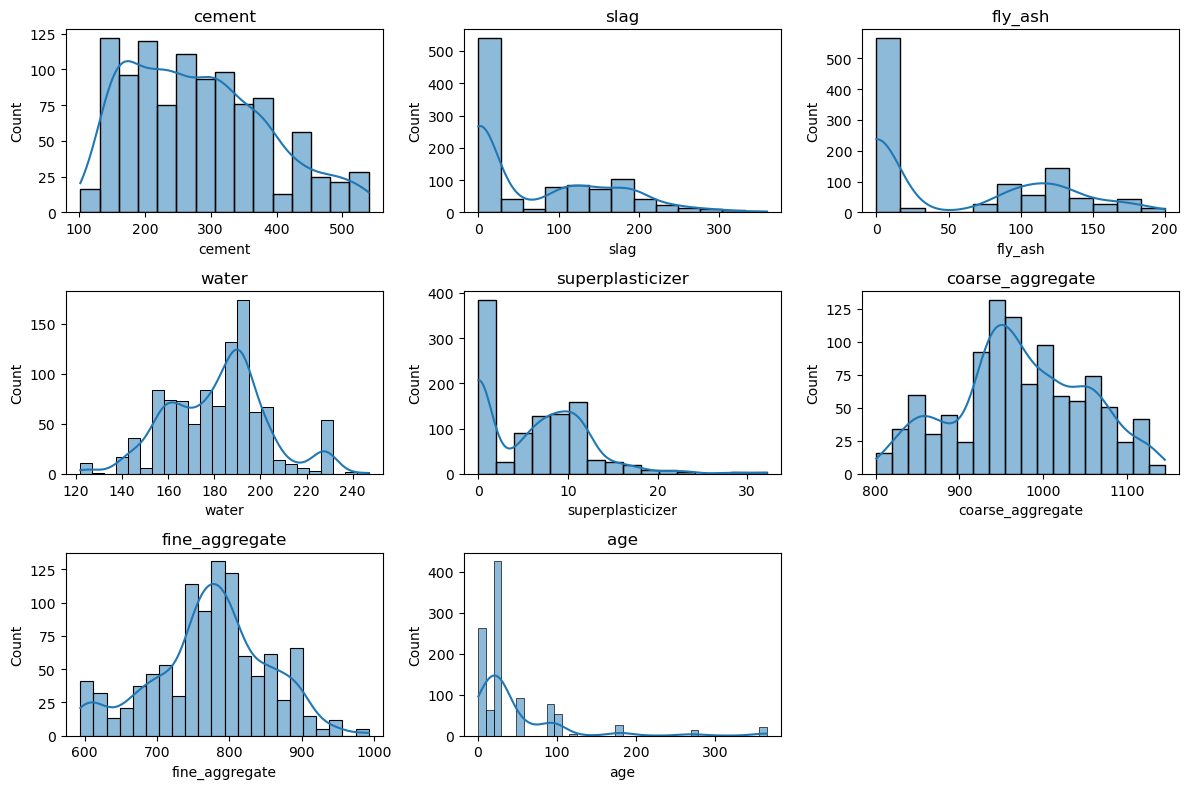

In [12]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(concrete_df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(concrete_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

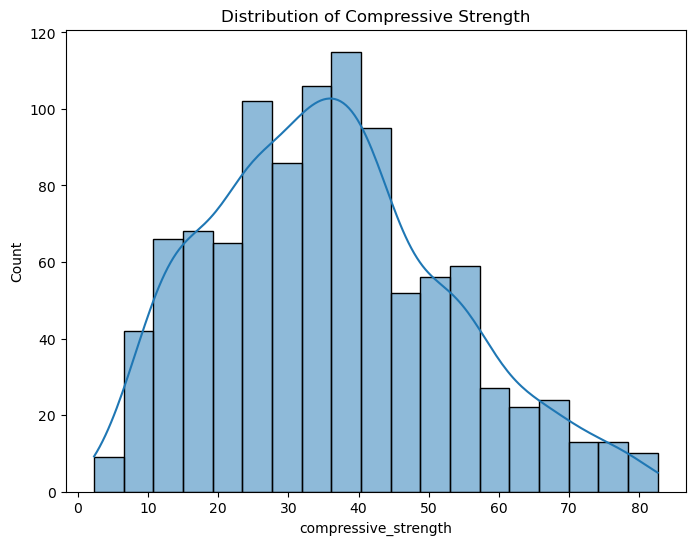

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(concrete_df['compressive_strength'], kde=True)
plt.title('Distribution of Compressive Strength')
plt.show()


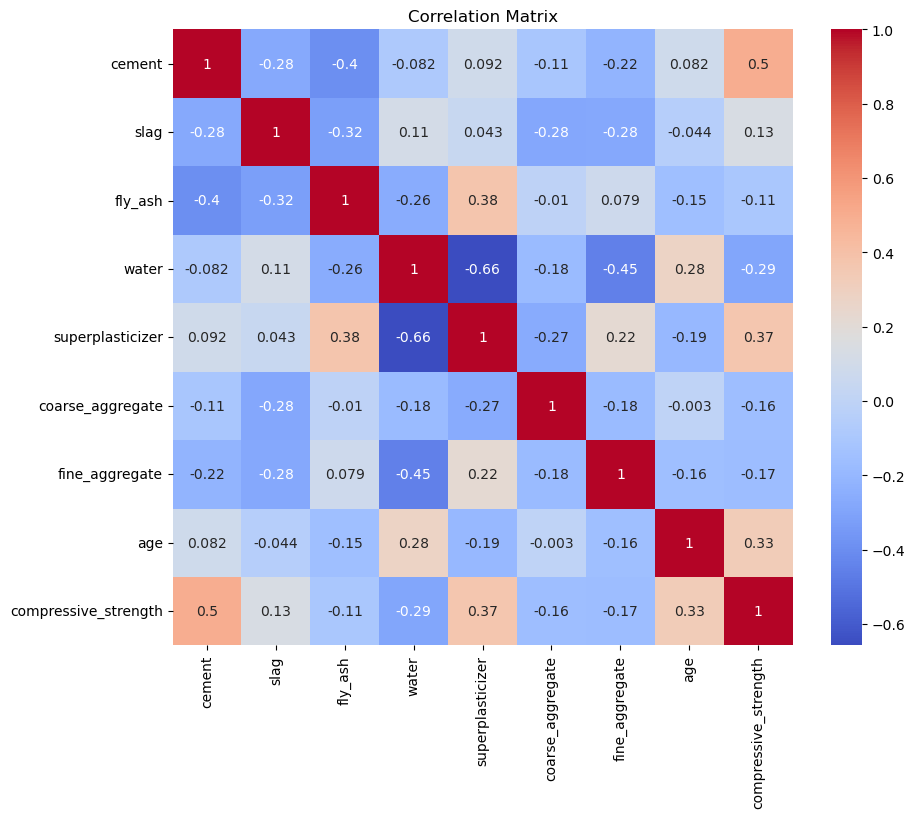

In [14]:
plt.figure(figsize=(10,8))
corr_matrix = concrete_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

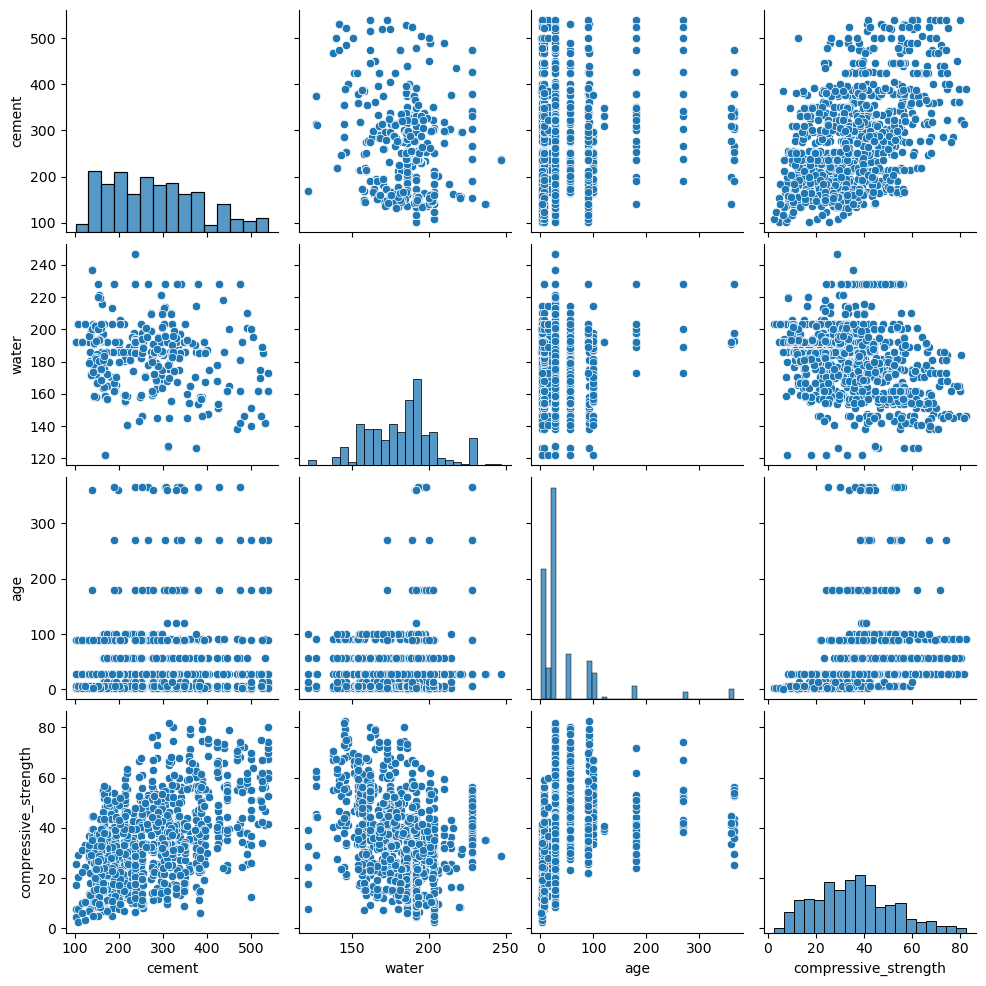

In [15]:
sns.pairplot(concrete_df[['cement', 'water', 'age', 'compressive_strength']])
plt.show()

In [16]:
X = concrete_df.drop('compressive_strength', axis=1)
y = concrete_df['compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.columns)])


In [18]:
knn_reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', KNeighborsRegressor())])

In [19]:
knn_reg_pipe.fit(X_train, y_train)
y_pred = knn_reg_pipe.predict(X_test)

print("Base KNN Regressor Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Base KNN Regressor Performance:
RMSE: 9.449666552566422
MAE: 7.3532297734627825
R2 Score: 0.6699752745513452


In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9, 11, 15],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

grid_search = GridSearchCV(knn_reg_pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation RMSE: {:.2f}".format(np.sqrt(-grid_search.best_score_)))

Best parameters: {'regressor__n_neighbors': 7, 'regressor__p': 2, 'regressor__weights': 'distance'}
Best cross-validation RMSE: 8.62


In [22]:
best_knn_reg = grid_search.best_estimator_
y_pred = best_knn_reg.predict(X_test)

print("\nOptimized KNN Regressor Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Optimized KNN Regressor Performance:
RMSE: 8.616846487669553
MAE: 6.3213898931043495
R2 Score: 0.7255834991155005


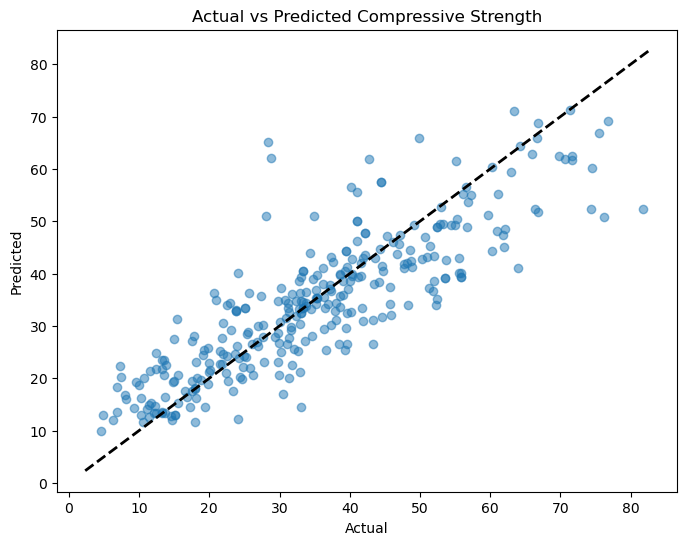

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Compressive Strength')
plt.show()